In [3]:
#-*- coding:utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
diabetes=pd.read_csv('diabetes.txt')
print(diabetes.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [4]:
#默认5行
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#“结果”是我们将要预测的特征，0意味着未患糖尿病，1意味着患有糖尿病。在768个数据点中，500个被标记为0,268个标记为1。
print(diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


In [6]:
#显示数据的维度
print("dimennsion of diabetes data:{}".format(diabetes.shape))

dimennsion of diabetes data:(768, 9)


Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

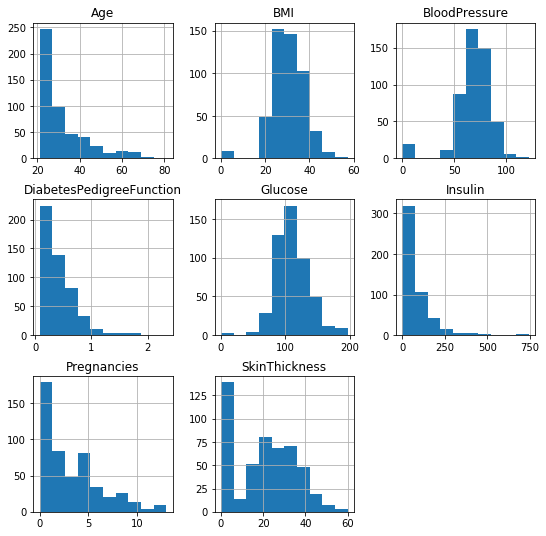

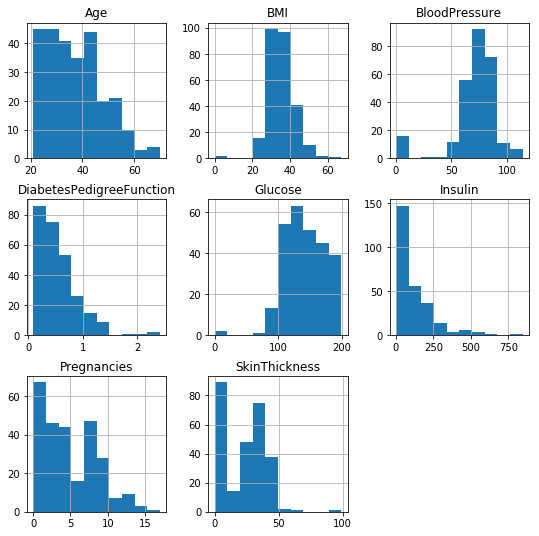

In [7]:
diabetes.groupby('Outcome').hist(figsize=(9, 9))

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

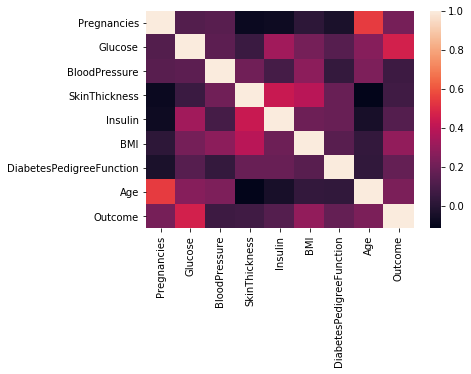

In [8]:
import seaborn as sns
corr = diabetes.corr()
print(corr)
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

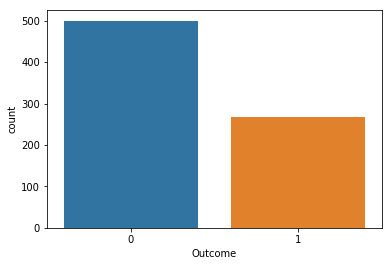

In [9]:
sns.countplot(diabetes['Outcome'],label="Count")

In [10]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.0 KB


In [11]:
#血压（Blood pressure）:通过分析数据，我们发现有些血压值为0。很明显，一个正常人的血压不可能为0，所以这些数据是错误的。
print("Blood pressure")
print("Total : ", diabetes[diabetes.BloodPressure == 0].shape[0])
print(diabetes[diabetes.BloodPressure == 0].groupby('Outcome')['Age'].count())
print("\n")

#血糖水平（Plasma glucose levels）: 同样，人的血糖水平也不可能降至0，所以数据集中有5列血糖值异常。
print("Plasma glucose levels")
print("Total : ", diabetes[diabetes.Glucose == 0].shape[0])
print(diabetes[diabetes.Glucose == 0].groupby('Outcome')['Age'].count())
print("\n")

#皮褶厚度（Skin Fold Thickness）: 正常人的皮褶厚度一般不会小于10mm，可以发现该参数共出现227次0值。
print("Skin Fold Thickness")
print("Total : ", diabetes[diabetes.SkinThickness == 0].shape[0])
print(diabetes[diabetes.SkinThickness == 0].groupby('Outcome')['Age'].count())
print("\n")

#身体质量指数（BMI）: 除非一个人体重降低到威胁生命的地步，否则BMI值不为0或者接近0。
print("BMI")
print("Total : ", diabetes[diabetes.BMI == 0].shape[0])
print(diabetes[diabetes.BMI == 0].groupby('Outcome')['Age'].count())
print("\n")

#胰岛素（Insulin）: 在极特殊的情况下，人体胰岛素值才会降低到0，而我们发现共有374项数据的胰岛素值出现0值，这显然是不正常的。
print("Insulin")
print("Total : ", diabetes[diabetes.Insulin == 0].shape[0])
print(diabetes[diabetes.Insulin == 0].groupby('Outcome')['Age'].count())
print("\n")


Blood pressure
Total :  35
Outcome
0    19
1    16
Name: Age, dtype: int64


Plasma glucose levels
Total :  5
Outcome
0    3
1    2
Name: Age, dtype: int64


Skin Fold Thickness
Total :  227
Outcome
0    139
1     88
Name: Age, dtype: int64


BMI
Total :  11
Outcome
0    9
1    2
Name: Age, dtype: int64


Insulin
Total :  374
Outcome
0    236
1    138
Name: Age, dtype: int64




In [12]:
diabetes_mod = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]
print(diabetes_mod.shape)

(724, 9)


In [13]:
#划分数据集和测试集
#选取前433行，1-8列  作训练集
x_train=diabetes_mod.iloc[0:433, 0:8]
#选取前433行，第9列  作训练集
y_train=diabetes_mod.iloc[0:433, 8:9]
#选取434-723行，1-8列 作测试集
x_test=diabetes_mod.iloc[434:723, 0:8]
#选取434-723行，第9列 作测试集
y_test=diabetes_mod.iloc[434:723, 8:9]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(433, 8)
(289, 8)
(433, 1)
(289, 1)


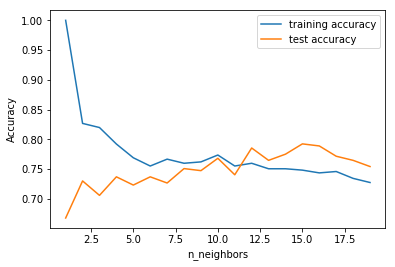

In [14]:
#首先用knn研究一下是否能够确认模型的复杂度和精确度之间的关系
from sklearn.neighbors import KNeighborsClassifier
training_accuracy=[]
test_accuracy=[]
#try n_neighbors from 1 to 10
neighbors_settings=range(1,20)
 
for n_neighbors in neighbors_settings:
    #build the model
    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train, y_train.values.ravel())
    #record training set accuracy
    training_accuracy.append(knn.score(x_train,y_train))
    #record test set accuracy
    test_accuracy.append(knn.score(x_test,y_test))
plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [15]:
n_neighbors=15
knn=KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(x_train, y_train.values.ravel())
print(round(knn.score(x_train,y_train),4))
print(round(knn.score(x_test,y_test),4))


0.7483
0.7924


In [16]:
#逻辑回归算法

from sklearn.linear_model import LogisticRegression
LogisticRegression(multi_class="multinomial", solver="newton-cg")
#x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size= 0.8,test_size=0.2,random_state=28)
logreg=LogisticRegression().fit(x_train,y_train.values.ravel())
print("Training set score:{:.4f}".format(logreg.score(x_train, y_train)))#精确到小数点后三位
print("Test set score:{:.4f}".format(logreg.score(x_test,y_test)))

Training set score:0.7483
Test set score:0.8062


c:\users\caijinyang\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [17]:
#而将正则化参数C设置为100时，模型在训练集上准确度稍有提高但测试集上准确度略降，
#说明较少正则化和更复杂的模型并不一定会比默认参数模型的预测效果更好。
#所以我们选择默认值C=1
logreg100=LogisticRegression(C=100).fit(x_train,y_train.values.ravel())
print("Training set accuracy:{:.4f}".format(logreg100.score(x_train,y_train)))
print("Test set accuracy:{:.4f}".format(logreg100.score(x_test, y_test)))



Training set accuracy:0.7621
Test set accuracy:0.8131


c:\users\caijinyang\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


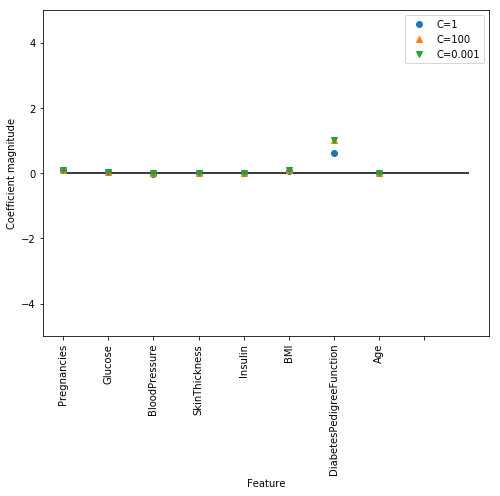

In [18]:
#用可视化的方式来看一下用三种不同正则化参数C所得模型的系数。
#更强的正则化(C = 0.001)会使系数越来越接近于零。仔细地看图，
#我们还能发现特征“DiabetesPedigreeFunction”（糖尿病遗传函数）在 C=100, C=1 和C=0.001的情况下, 系数都为正。
#这表明无论是哪个模型，DiabetesPedigreeFunction（糖尿病遗传函数）这个特征值都与样本为糖尿病是正相关的。
diabetes_features=[x for i,x in enumerate(diabetes. columns) if i!=8]
plt. figure(figsize=(8,6))
plt. plot(logreg. coef_.T,'o', label="C=1")
plt. plot(logreg100.coef_.T,'^', label="C=100")
plt. plot(logreg100.coef_.T,'v', label="C=0.001")
plt. xticks(range(diabetes. shape[1]), diabetes_features, rotation=90)
plt. hlines(0,0, diabetes. shape[1])
plt. ylim(-5,5)
plt. xlabel("Feature")
plt. ylabel("Coefficient magnitude")
plt. legend()
plt. savefig('1og_coef')




In [19]:
#决策树算法
from sklearn.tree import DecisionTreeClassifier 
tree=DecisionTreeClassifier(random_state=0)
tree.fit(x_train,y_train)
print("Accuracy on training set:{:.4f}".format(tree. score(x_train, y_train)))
print("Accuracy on test set:{:.4f}".format(tree. score(x_test, y_test)))

Accuracy on training set:1.0000
Accuracy on test set:0.7612


In [20]:
#训练集的准确度可以高达100%，而测试集的准确度相对就差了很多。这表明决策树是过度拟合的，不能对新数据产生好的效果。
#因此，我们需要对树进行预剪枝。
#我们设置max_depth=3，限制树的深度以减少过拟合。这会使训练集的准确度降低，但测试集准确度提高。
tree=DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(x_train,y_train)
print("Accuracy on training set:{:.4f}".format(tree.score(x_train, y_train)))
print("Accuracy on test set:{:.4f}".format(tree.score(x_test, y_test)))

Accuracy on training set:0.7436
Accuracy on test set:0.7612


In [21]:
#决策树中特征重要度, 决策树中的特征重要度是用来衡量每个特征对于预测结果的重要性的。
#对每个特征有一个从0到1的打分，0表示“一点也没用”，1表示“完美预测”。各特征的重要度加和一定是为1的。
print("Feature importances:\n{}".format(tree. feature_importances_))

Feature importances:
[0.         0.66929731 0.         0.         0.05142312 0.18103196
 0.05479787 0.04344974]


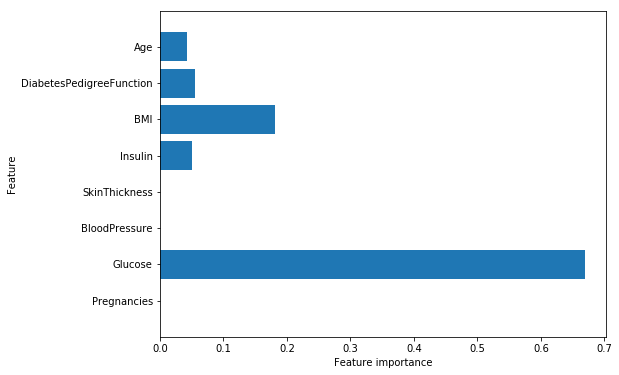

In [22]:
#可视化特征重要度，可以从图中看出，血糖是最重要的特征
#diabetes_features=[x for i,x in enumerate(diabetes.columns) if i!=8]
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_,align ='center')
    #plt.barh(range(n_features), model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1,n_features)
plot_feature_importances_diabetes(tree)
plt. savefig(' feature_importance')

In [23]:
#再用随机森林算法进行研究
from sklearn. ensemble import RandomForestClassifier 
rf=RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train,y_train.values.ravel())
print("Accuracy on training set:{:.4f}".format(rf.score(x_train, y_train)))
print("Accuracy on test set:{:.4f}".format(rf.score(x_test, y_test)))

Accuracy on training set:1.0000
Accuracy on test set:0.8131


In [24]:
#没有更改任何参数的随机森林比逻辑回归和单一决策树的预测效果更好。
#再试试调整max_features设置，看看效果是否能够提高。
#可以看到结果并没有提高，这表明默认参数的随机森林在这里效果很好。
rf1=RandomForestClassifier(max_depth=3,n_estimators=100, random_state=0)
rf1. fit(x_train,y_train.values.ravel())
print("Accuracy on training set:{:.4f}". format(rf1. score(x_train, y_train)))
print("Accuracy on test set:{:.4f}". format(rf1. score(x_test, y_test)))

Accuracy on training set:0.7968
Accuracy on test set:0.7820


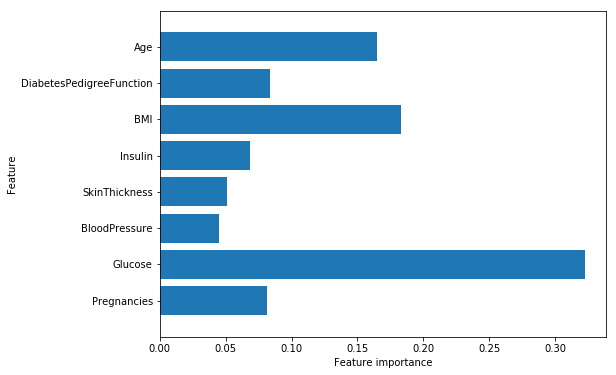

In [25]:
#随机森林的特征重要度：
#与单一决策树相似，随机森林的结果仍然显示特征“血糖”的重要度最高，
#但是它也同样显示“BMI（身体质量指数）”在整体中是第二重要的信息特征。
#随机森林的随机性促使算法考虑了更多可能的解释，这就导致随机森林捕获的数据比单一树要大得多。
plot_feature_importances_diabetes(rf1)

In [27]:
#深度学习算法
#从结果中我们可以看到，多层神经网络（MLP）的预测准确度并不如其他模型表现的好，这可能是数据的尺度不同造成的。

from sklearn.neural_network import MLPClassifier 
mlp=MLPClassifier(random_state=42)
mlp.fit(x_train,y_train.values.ravel())
print("Accuracy on training set:{:.4f}". format(mlp. score(x_train, y_train)))
print("Accuracy on test set:{:.4f}". format(mlp. score(x_test, y_test)))




Accuracy on training set:0.7113
Accuracy on test set:0.6990


In [28]:
#深度学习算法同样也希望所有输入的特征在同一尺度范围内变化。
#理想情况下，是均值为0，方差为1。所以，我们必须重新标准化我们的数据，以便能够满足这些需求。
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)
x_train_scaled=x_train_scaled.astype(np.float64)
x_test_scaled=x_test_scaled.astype(np.float64)
mlp=MLPClassifier(random_state=0)
mlp.fit(x_train_scaled,y_train.values.ravel())
print("Accuracy on training set:{:.4f}".format(mlp.score(x_train_scaled,y_train)))
print("Accuracy on test set:{:.4f}".format(mlp. score(x_test_scaled, y_test)))



c:\users\caijinyang\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\caijinyang\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\users\caijinyang\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\caijinyang\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X,

Accuracy on training set:0.8106
Accuracy on test set:0.7993


c:\users\caijinyang\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [29]:
#增加迭代次数：
#从结果可以发现，增加迭代次数仅仅提升了训练集的性能，而对测试集没有效果。
#max_iter=1000
mlp=MLPClassifier(max_iter=10000, random_state=0)
mlp.fit(x_train_scaled,y_train.values.ravel())
print("Accuracy on training set:{:.4f}". format(mlp.score(x_train_scaled,y_train)))
print("Accuracy on test set:{:.4f}". format(mlp. score(x_test_scaled, y_test)))

Accuracy on training set:0.9792
Accuracy on test set:0.7682


In [30]:
#使用调高alpha参数并且加强权重的正则化的方法。
#从运行结果来看，这个结果是好的，但我们无法更进一步提升测试集准确度。
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(max_iter=10000, alpha=1, random_state=0)
mlp.fit(x_train_scaled,y_train.values.ravel())
print("Accuracy on training set:{:.4f}".format(mlp.score(x_train_scaled,y_train)))
print("Accuracy on test set:{:.4f}".format(mlp.score(x_test_scaled, y_test)))


Accuracy on training set:0.7806
Accuracy on test set:0.8166


结论：因此，到目前为止我们最好的模型是在数据标准化后的默认参数深度学习模型。

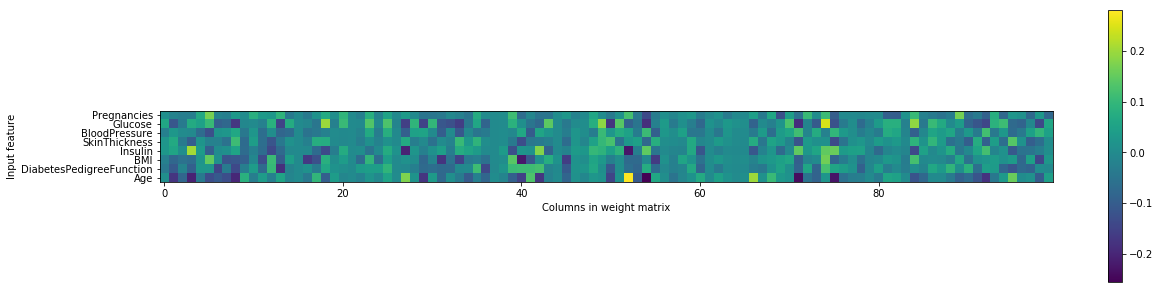

In [31]:
#一个在糖尿病数据集上学习的神经网络的第一层权重热图。
#热度图中，快速指出哪个或哪些特征的权重较高或较低是不容易的。
plt. figure(figsize=(20,5))
#plt. imshow(mlp.coefs_[0], interpolation=' none', cmap='viridis')
plt.imshow(mlp.coefs_[0],interpolation='none',cmap='viridis')
plt.yticks(range(8), diabetes_features)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()